In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/drive/MyDrive/Assistive_document_reading/Dataset.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/Assistive_document_reading/Dataset.zip
   creating: /content/data/Dataset/test/
   creating: /content/data/Dataset/test/Move away/
  inflating: /content/data/Dataset/test/Move away/IMG_20220317_123556.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220317_123659.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_123848.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_123922.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124035.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124101.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124110_01.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124112.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124112_01.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124124.png  
  inflating: /content/data/Dataset/test/Move away/IMG_20220319_124128.

In [ ]:
!unzip "/content/drive/MyDrive/Assistive_document_reading/a_output.zip" -d "/content/data/temp"

Archive:  /content/drive/MyDrive/Assistive_document_reading/a_output.zip
   creating: /content/data/temp/a_output/test/
   creating: /content/data/temp/a_output/test/Move Away/
  inflating: /content/data/temp/a_output/test/Move Away/IMG_20220326_160332.png  
   creating: /content/data/temp/a_output/test/Perfect/
   creating: /content/data/temp/a_output/train/
   creating: /content/data/temp/a_output/train/Move Away/
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160132.png  
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160133.png  
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160134.png  
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160135.png  
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160137.png  
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160138.png  
  inflating: /content/data/temp/a_output/train/Move Away/IMG_20220326_160139.png  

In [ ]:
import shutil
import os
for i in os.listdir("/content/data/temp/a_output/val/Move Away"):
  shutil.move("/content/data/temp/a_output/val/Move Away/"+ i, "/content/data/Dataset/val/Move away")

In [ ]:
import shutil
import os
for i in os.listdir("/content/data/temp/a_output/val/Perfect"):
  shutil.move("/content/data/temp/a_output/val/Perfect/"+ i, "/content/data/Dataset/val/Perfect")

In [ ]:
import shutil
import os
for i in os.listdir("/content/data/temp/a_output/train/Perfect"):
  shutil.move("/content/data/temp/a_output/train/Perfect/"+ i, "/content/data/Dataset/train/Perfect")

In [ ]:
import shutil
import os
for i in os.listdir("/content/data/temp/a_output/train/Move Away"):
  shutil.move("/content/data/temp/a_output/train/Move Away/"+ i, "/content/data/Dataset/train/Move away")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Batch_size = 8
img_h = 256
img_w = 256
num_classes=7

classes = ['Move away',
           'Move downwards',
           'Move towards left',
           'Move towards right',
           'Move upwards',
           'Perfect',
           'Rotate Anticlockwise',
           'Rotate Clockwise'
           ]
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image
train_dataGen = ImageDataGenerator(width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   brightness_range=(0.2,0.8),
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255,
                                    preprocessing_function=to_grayscale_then_rgb)

valid_dataGen = ImageDataGenerator(width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    brightness_range=(0.2,0.8),
                                    fill_mode='constant',
                                    cval=0,
                                    rescale=1./255,
                                    preprocessing_function=to_grayscale_then_rgb)

test_dataGen = ImageDataGenerator(rescale=1./255,preprocessing_function=to_grayscale_then_rgb)

dataset_dir = "/content/data/Dataset"

SEED = 1234
tf.random.set_seed(SEED) 

training_dir = os.path.join(dataset_dir, 'train')
train_generator = train_dataGen.flow_from_directory(training_dir,
                                               target_size=(256, 256),
                                               batch_size=Batch_size,
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)  # targets are directly converted into one-hot vectors

# Validation
valid_dir = os.path.join(dataset_dir, 'val')
validation_generator = valid_dataGen.flow_from_directory(valid_dir,
                                           target_size=(256, 256),
                                           batch_size=Batch_size, 
                                           classes=classes,
                                           class_mode='categorical',
                                           shuffle=False,
                                           seed=SEED)
# Test
test_dir = os.path.join(dataset_dir, 'test')
test_generator = test_dataGen.flow_from_directory(test_dir,
                                             target_size=(256, 256),
                                             batch_size=10, 
                                             shuffle=False,
                                             seed=SEED,
                                             class_mode=None,
                                             )

Found 1908 images belonging to 8 classes.
Found 363 images belonging to 8 classes.
Found 117 images belonging to 8 classes.


In [ ]:
image_size = 299
IMG_SHAPE = (image_size, image_size, 3)

#Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              classifier_activation='softmax',
                                              weights='imagenet')

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          #keras.layers.Dense(1, activation='sigmoid')
                            keras.layers.Dense(8, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 16392     
                                                                 
Total params: 20,877,872
Trainable params: 16,392
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

epochs = 20
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.0001)

history = model.fit(train_generator,
                              steps_per_epoch=train_generator.n//train_generator.batch_size,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.n//validation_generator.batch_size,
                              callbacks = [reduce_lr])

Epoch 1/20
238/238 [==============================] - 92s 341ms/step - loss: 1.2145 - accuracy: 0.6463 - val_loss: 0.7415 - val_accuracy: 0.8222 - lr: 0.0010
Epoch 2/20
238/238 [==============================] - 72s 298ms/step - loss: 0.6483 - accuracy: 0.8295 - val_loss: 0.5993 - val_accuracy: 0.8417 - lr: 0.0010
Epoch 3/20
238/238 [==============================] - 73s 304ms/step - loss: 0.4912 - accuracy: 0.8779 - val_loss: 0.4648 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/20
238/238 [==============================] - 73s 303ms/step - loss: 0.3965 - accuracy: 0.9016 - val_loss: 0.3746 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 5/20
238/238 [==============================] - 72s 299ms/step - loss: 0.3275 - accuracy: 0.9253 - val_loss: 0.3140 - val_accuracy: 0.9278 - lr: 0.0010
Epoch 6/20
238/238 [==============================] - 72s 300ms/step - loss: 0.2871 - accuracy: 0.9363 - val_loss: 0.3015 - val_accuracy: 0.9111 - lr: 0.0010
Epoch 7/20
238/238 [==============================] 

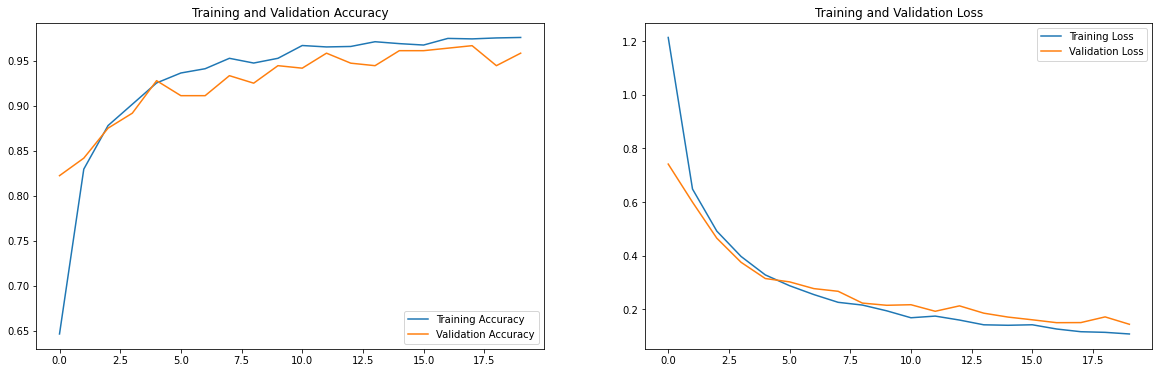

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Assistive_document_reading/Model-2-Xception-before-finetuning.h5')

In [ ]:
model.evaluate(validation_generator, steps=validation_generator.n//validation_generator.batch_size,verbose=1)

45/45 [==============================] - 23s 515ms/step - loss: 0.1411 - accuracy: 0.9556


[0.1411120891571045, 0.9555555582046509]

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

11/11 [==============================] - 7s 571ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
predicted_class_indices

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
base_model.trainable = True
model = tf.keras.Sequential([
                          base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          #keras.layers.Dense(1, activation='sigmoid')
                            keras.layers.Dense(8, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 8)                 16392     
                                                                 
Total params: 20,877,872
Trainable params: 20,823,344
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 25
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2,
                              patience=5, min_lr=0.0001)
modelcheckpoint = ModelCheckpoint(filepath='/content/drive/My Drive/Assistive_document_reading/TempModels-1/{epoch:02d}-xception_val_acc{val_accuracy:.3f}.h5',
                                verbose=1, save_best_only=False, monitor='val_accuracy', save_weights_only=False)
history = model.fit(train_generator,
                              steps_per_epoch=train_generator.n//train_generator.batch_size,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_generator.n//validation_generator.batch_size,
                              callbacks = [reduce_lr, modelcheckpoint])

Epoch 1/25
238/238 [==============================] - ETA: 0s - loss: 0.6579 - accuracy: 0.7974
Epoch 1: saving model to /content/drive/My Drive/Assistive_document_reading/TempModels-1/01-xception_val_acc0.742.h5
238/238 [==============================] - 100s 393ms/step - loss: 0.6579 - accuracy: 0.7974 - val_loss: 0.8680 - val_accuracy: 0.7417 - lr: 0.0010
Epoch 2/25
238/238 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.9184
Epoch 2: saving model to /content/drive/My Drive/Assistive_document_reading/TempModels-1/02-xception_val_acc0.933.h5
238/238 [==============================] - 94s 391ms/step - loss: 0.2663 - accuracy: 0.9184 - val_loss: 0.2537 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 3/25
238/238 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9463
Epoch 3: saving model to /content/drive/My Drive/Assistive_document_reading/TempModels-1/03-xception_val_acc0.939.h5
238/238 [==============================] - 92s 385ms/step - loss: 

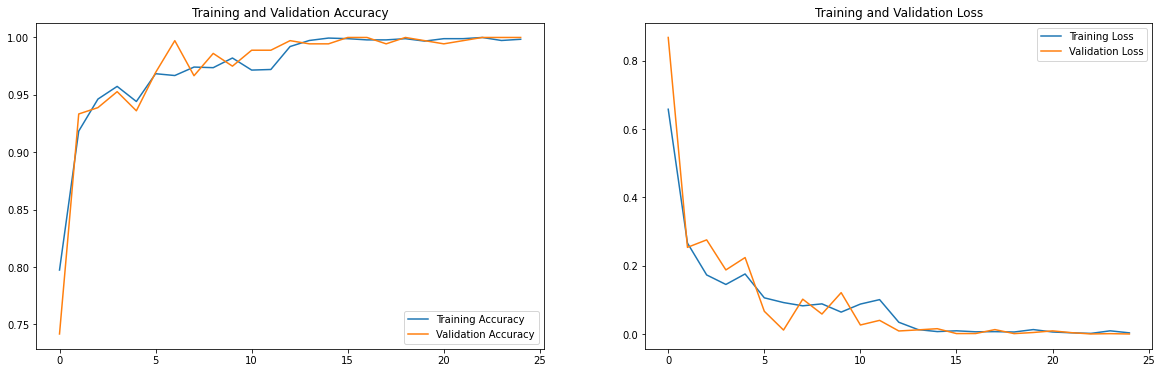

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Assistive_document_reading/Model-2-Xception-AfterFinetuning.h5')

In [ ]:
model.evaluate(validation_generator, steps=validation_generator.n//validation_generator.batch_size,verbose=1)

45/45 [==============================] - 23s 516ms/step - loss: 2.2768e-04 - accuracy: 1.0000


[0.00022768377675674856, 1.0]

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

11/11 [==============================] - 7s 622ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)


In [ ]:
predicted_class_indices


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7])

In [ ]:
train_generator.class_indices

{'Move away': 0,
 'Move downwards': 1,
 'Move towards left': 2,
 'Move towards right': 3,
 'Move upwards': 4,
 'Perfect': 5,
 'Rotate Anticlockwise': 6,
 'Rotate Clockwise': 7}

In [ ]:
from tensorflow.keras.preprocessing import image
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

def load_image(img_path, show=False):
    img = image.load_img(img_path, target_size=(299, 299))
    img_tensor = image.img_to_array(img)                   
    # img_tensor = to_grayscale_then_rgb(img_tensor)
    # img_tensor = np.array([img_tensor[:,:,0]])
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0], cmap='gray')                           
        # plt.axis('off')
        plt.show()

    return img_tensor

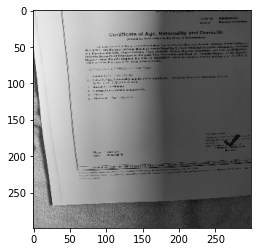

In [ ]:
img = load_image("/content/drive/MyDrive/Assistive_document_reading/TESTING/0_4.jpeg", True)

In [ ]:
p = model.predict(img)
np.argmax(p),np.amax(p)

In [ ]:
import os
def evaluate_model(model, name):
  count = 0
  correct = 0
  for i in os.listdir("/content/drive/MyDrive/Assistive_document_reading/TESTING"):
    if(i != ".ipynb_checkpoints"):
      count += 1
      ans = np.argmax(model.predict(load_image("/content/drive/MyDrive/Assistive_document_reading/TESTING/" + i)))
      if(int((i.split(".")[0]).split('_')[0]) == ans):
        correct += 1
  return "Accuracy of model " + name + " : " + str((correct/count) * 100) + "  %"

In [ ]:
res = []
for i in os.listdir("/content/drive/MyDrive/Assistive_document_reading/TempModels-1"):
  if(i.endswith(".h5")):
    model = tf.keras.models.load_model("/content/drive/MyDrive/Assistive_document_reading/TempModels-1/" + i)
    res.append(evaluate_model(model, i))
for i in res:
  print(i)

Accuracy of model Model-2-Xception-before-finetuning.h5 : 35.08771929824561  %
Accuracy of model 06-xception_val_acc0.969.h5 : 26.31578947368421  %
Accuracy of model 07-xception_val_acc0.997.h5 : 59.64912280701754  %
Accuracy of model 09-xception_val_acc0.986.h5 : 42.10526315789473  %
Accuracy of model 11-xception_val_acc0.989.h5 : 42.10526315789473  %
Accuracy of model 12-xception_val_acc0.989.h5 : 47.368421052631575  %
Accuracy of model 13-xception_val_acc0.997.h5 : 50.877192982456144  %
Accuracy of model 14-xception_val_acc0.994.h5 : 52.63157894736842  %
Accuracy of model 15-xception_val_acc0.994.h5 : 52.63157894736842  %
Accuracy of model 16-xception_val_acc1.000.h5 : 47.368421052631575  %
Accuracy of model 17-xception_val_acc1.000.h5 : 35.08771929824561  %
Accuracy of model 18-xception_val_acc0.994.h5 : 43.859649122807014  %
Accuracy of model 19-xception_val_acc1.000.h5 : 42.10526315789473  %
Accuracy of model 20-xception_val_acc0.997.h5 : 45.614035087719294  %
Accuracy of model 2

In [ ]:
from tensorflow import lite
converter = tf.lite.TFLiteConverter.from_keras_model(tf.keras.models.load_model('/content/drive/MyDrive/Assistive_document_reading/TempModels-1/20-val_acc0.994.h5'))
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpg04844fd/assets


INFO:tensorflow:Assets written to: /tmp/tmpg04844fd/assets


In [ ]:
with open('/content/drive/MyDrive/Assistive_document_reading/FINAL_MODEL.tflite', 'wb') as f:
  f.write(tflite_model)